# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209324e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b2 max relative error: 4.447646e-11
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


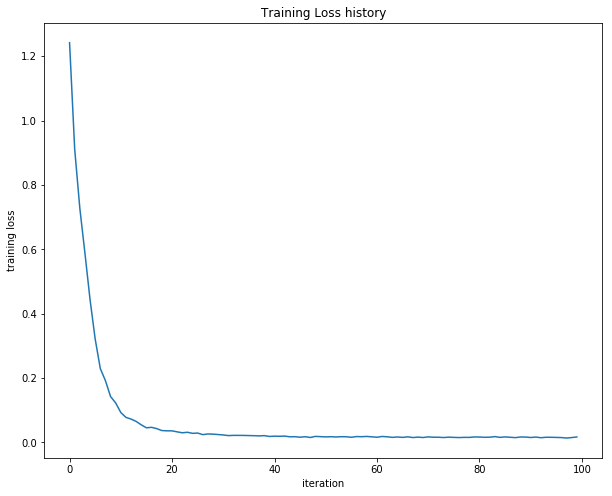

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

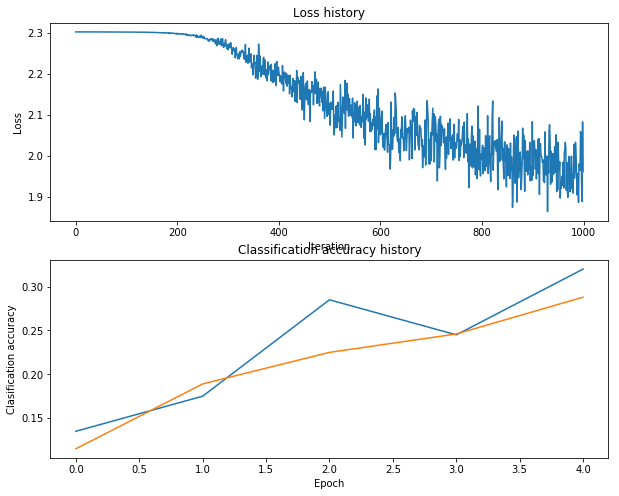

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

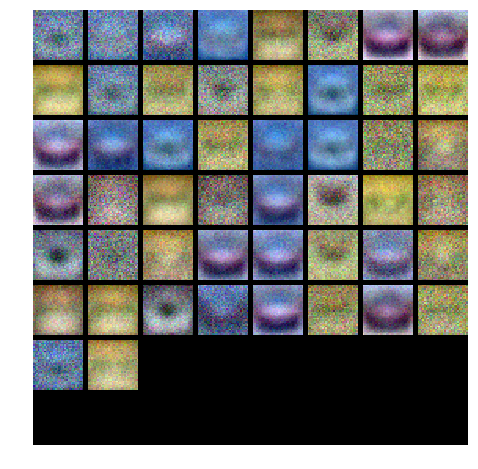

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [11]:
from tqdm import tqdm
best_acc = 0
input_size = 32 * 32 * 3
hidden_size = [25, 50, 100, 150, 200, 300, 500]
regularization = [0.25, 0.1, 0.5]
learning_rate = [1e-3, 1e-4, 5e-4, 2e-4, 2e-3]
num_classes = 10
for h in tqdm(hidden_size):
    for rs in tqdm(regularization):
        for lr in tqdm(learning_rate):
            net = TwoLayerNet(input_size, h, num_classes)
            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
                              num_iters=10000, batch_size=200,
                              learning_rate=lr, learning_rate_decay=0.95,
                              reg=rs, verbose=False)
            # Predict on the validation set
            val_acc = (net.predict(X_val) == y_val).mean()
            print('Validation accuracy: ', val_acc)
            print('Hidden size: ', h)
            print('Regularization strength: ', rs)
            print('Learning rate: ', lr)
            if val_acc > best_acc:
                best_net = net
                best_stats = stats
                best_acc = val_acc

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:53<03:32, 53.09s/it]

Validation accuracy:  0.508
Hidden size:  25
Regularization strength:  0.25
Learning rate:  0.001




 40%|████      | 2/5 [01:46<02:40, 53.34s/it]

Validation accuracy:  0.436
Hidden size:  25
Regularization strength:  0.25
Learning rate:  0.0001




 60%|██████    | 3/5 [02:38<01:45, 52.77s/it]

Validation accuracy:  0.479
Hidden size:  25
Regularization strength:  0.25
Learning rate:  0.0005




 80%|████████  | 4/5 [03:32<00:53, 53.10s/it]

Validation accuracy:  0.449
Hidden size:  25
Regularization strength:  0.25
Learning rate:  0.0002




100%|██████████| 5/5 [04:47<00:00, 57.59s/it]


 33%|███▎      | 1/3 [04:47<09:35, 287.95s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.495
Hidden size:  25
Regularization strength:  0.25
Learning rate:  0.002




 20%|██        | 1/5 [00:46<03:07, 46.88s/it]

Validation accuracy:  0.486
Hidden size:  25
Regularization strength:  0.1
Learning rate:  0.001




 40%|████      | 2/5 [01:39<02:29, 49.69s/it]

Validation accuracy:  0.44
Hidden size:  25
Regularization strength:  0.1
Learning rate:  0.0001




 60%|██████    | 3/5 [02:30<01:40, 50.13s/it]

Validation accuracy:  0.493
Hidden size:  25
Regularization strength:  0.1
Learning rate:  0.0005




 80%|████████  | 4/5 [03:20<00:50, 50.11s/it]

Validation accuracy:  0.461
Hidden size:  25
Regularization strength:  0.1
Learning rate:  0.0002




100%|██████████| 5/5 [04:09<00:00, 49.88s/it]


 67%|██████▋   | 2/3 [08:57<04:28, 268.68s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.476
Hidden size:  25
Regularization strength:  0.1
Learning rate:  0.002




 20%|██        | 1/5 [00:51<03:24, 51.24s/it]

Validation accuracy:  0.482
Hidden size:  25
Regularization strength:  0.5
Learning rate:  0.001




 40%|████      | 2/5 [01:48<02:42, 54.13s/it]

Validation accuracy:  0.445
Hidden size:  25
Regularization strength:  0.5
Learning rate:  0.0001




 60%|██████    | 3/5 [02:48<01:52, 56.23s/it]

Validation accuracy:  0.492
Hidden size:  25
Regularization strength:  0.5
Learning rate:  0.0005




 80%|████████  | 4/5 [04:05<01:01, 61.33s/it]

Validation accuracy:  0.474
Hidden size:  25
Regularization strength:  0.5
Learning rate:  0.0002




100%|██████████| 5/5 [05:43<00:00, 68.80s/it]


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.503
Hidden size:  25
Regularization strength:  0.5
Learning rate:  0.002




 20%|██        | 1/5 [01:28<05:54, 88.72s/it]

Validation accuracy:  0.526
Hidden size:  50
Regularization strength:  0.25
Learning rate:  0.001




 40%|████      | 2/5 [03:45<05:37, 112.61s/it]

Validation accuracy:  0.453
Hidden size:  50
Regularization strength:  0.25
Learning rate:  0.0001




 60%|██████    | 3/5 [05:32<03:41, 110.82s/it]

Validation accuracy:  0.518
Hidden size:  50
Regularization strength:  0.25
Learning rate:  0.0005




 80%|████████  | 4/5 [06:35<01:38, 98.98s/it] 

Validation accuracy:  0.48
Hidden size:  50
Regularization strength:  0.25
Learning rate:  0.0002




100%|██████████| 5/5 [07:49<00:00, 93.86s/it]


 33%|███▎      | 1/3 [07:49<15:38, 469.28s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.54
Hidden size:  50
Regularization strength:  0.25
Learning rate:  0.002




 20%|██        | 1/5 [01:09<04:39, 69.93s/it]

Validation accuracy:  0.513
Hidden size:  50
Regularization strength:  0.1
Learning rate:  0.001




 40%|████      | 2/5 [02:20<03:30, 70.15s/it]

Validation accuracy:  0.45
Hidden size:  50
Regularization strength:  0.1
Learning rate:  0.0001




 60%|██████    | 3/5 [03:20<02:13, 66.84s/it]

Validation accuracy:  0.535
Hidden size:  50
Regularization strength:  0.1
Learning rate:  0.0005




 80%|████████  | 4/5 [04:24<01:06, 66.23s/it]

Validation accuracy:  0.477
Hidden size:  50
Regularization strength:  0.1
Learning rate:  0.0002




100%|██████████| 5/5 [05:32<00:00, 66.54s/it]


 67%|██████▋   | 2/3 [13:21<06:40, 401.00s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.53
Hidden size:  50
Regularization strength:  0.1
Learning rate:  0.002




 20%|██        | 1/5 [00:59<03:58, 59.68s/it]

Validation accuracy:  0.525
Hidden size:  50
Regularization strength:  0.5
Learning rate:  0.001




 40%|████      | 2/5 [02:02<03:03, 61.02s/it]

Validation accuracy:  0.445
Hidden size:  50
Regularization strength:  0.5
Learning rate:  0.0001




 60%|██████    | 3/5 [03:17<02:11, 65.75s/it]

Validation accuracy:  0.507
Hidden size:  50
Regularization strength:  0.5
Learning rate:  0.0005




 80%|████████  | 4/5 [04:42<01:10, 70.52s/it]

Validation accuracy:  0.475
Hidden size:  50
Regularization strength:  0.5
Learning rate:  0.0002




100%|██████████| 5/5 [06:04<00:00, 72.90s/it]


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.523
Hidden size:  50
Regularization strength:  0.5
Learning rate:  0.002




 20%|██        | 1/5 [01:59<07:57, 119.28s/it]

Validation accuracy:  0.536
Hidden size:  100
Regularization strength:  0.25
Learning rate:  0.001




 40%|████      | 2/5 [03:50<05:45, 115.13s/it]

Validation accuracy:  0.456
Hidden size:  100
Regularization strength:  0.25
Learning rate:  0.0001




 60%|██████    | 3/5 [05:38<03:45, 112.68s/it]

Validation accuracy:  0.525
Hidden size:  100
Regularization strength:  0.25
Learning rate:  0.0005




 80%|████████  | 4/5 [07:28<01:52, 112.24s/it]

Validation accuracy:  0.49
Hidden size:  100
Regularization strength:  0.25
Learning rate:  0.0002




100%|██████████| 5/5 [09:24<00:00, 112.91s/it]


 33%|███▎      | 1/3 [09:24<18:49, 564.54s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.554
Hidden size:  100
Regularization strength:  0.25
Learning rate:  0.002




 20%|██        | 1/5 [01:48<07:14, 108.58s/it]

Validation accuracy:  0.539
Hidden size:  100
Regularization strength:  0.1
Learning rate:  0.001




 40%|████      | 2/5 [05:33<08:20, 166.68s/it]

Validation accuracy:  0.456
Hidden size:  100
Regularization strength:  0.1
Learning rate:  0.0001




 60%|██████    | 3/5 [09:45<06:30, 195.32s/it]

Validation accuracy:  0.534
Hidden size:  100
Regularization strength:  0.1
Learning rate:  0.0005




 80%|████████  | 4/5 [12:55<03:13, 193.96s/it]

Validation accuracy:  0.5
Hidden size:  100
Regularization strength:  0.1
Learning rate:  0.0002




100%|██████████| 5/5 [16:15<00:00, 195.19s/it]


 67%|██████▋   | 2/3 [25:40<12:50, 770.26s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.521
Hidden size:  100
Regularization strength:  0.1
Learning rate:  0.002




 20%|██        | 1/5 [02:38<10:32, 158.18s/it]

Validation accuracy:  0.538
Hidden size:  100
Regularization strength:  0.5
Learning rate:  0.001




 40%|████      | 2/5 [05:17<07:56, 158.84s/it]

Validation accuracy:  0.458
Hidden size:  100
Regularization strength:  0.5
Learning rate:  0.0001




 60%|██████    | 3/5 [07:51<05:14, 157.15s/it]

Validation accuracy:  0.515
Hidden size:  100
Regularization strength:  0.5
Learning rate:  0.0005




 80%|████████  | 4/5 [10:41<02:40, 160.38s/it]

Validation accuracy:  0.479
Hidden size:  100
Regularization strength:  0.5
Learning rate:  0.0002




100%|██████████| 5/5 [13:10<00:00, 158.11s/it]


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.535
Hidden size:  100
Regularization strength:  0.5
Learning rate:  0.002




 20%|██        | 1/5 [04:01<16:06, 241.71s/it]

Validation accuracy:  0.552
Hidden size:  150
Regularization strength:  0.25
Learning rate:  0.001




 40%|████      | 2/5 [08:03<12:04, 241.65s/it]

Validation accuracy:  0.463
Hidden size:  150
Regularization strength:  0.25
Learning rate:  0.0001




 60%|██████    | 3/5 [12:02<08:01, 240.85s/it]

Validation accuracy:  0.548
Hidden size:  150
Regularization strength:  0.25
Learning rate:  0.0005




 80%|████████  | 4/5 [15:52<03:58, 238.20s/it]

Validation accuracy:  0.49
Hidden size:  150
Regularization strength:  0.25
Learning rate:  0.0002




100%|██████████| 5/5 [19:58<00:00, 239.65s/it]


 33%|███▎      | 1/3 [19:58<39:56, 1198.26s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.55
Hidden size:  150
Regularization strength:  0.25
Learning rate:  0.002




 20%|██        | 1/5 [04:22<17:30, 262.64s/it]

Validation accuracy:  0.548
Hidden size:  150
Regularization strength:  0.1
Learning rate:  0.001




 40%|████      | 2/5 [08:40<13:00, 260.17s/it]

Validation accuracy:  0.47
Hidden size:  150
Regularization strength:  0.1
Learning rate:  0.0001




 60%|██████    | 3/5 [11:41<07:47, 233.84s/it]

Validation accuracy:  0.54
Hidden size:  150
Regularization strength:  0.1
Learning rate:  0.0005




 80%|████████  | 4/5 [14:41<03:40, 220.30s/it]

Validation accuracy:  0.503
Hidden size:  150
Regularization strength:  0.1
Learning rate:  0.0002




100%|██████████| 5/5 [17:20<00:00, 208.18s/it]


 67%|██████▋   | 2/3 [37:19<18:39, 1119.58s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.55
Hidden size:  150
Regularization strength:  0.1
Learning rate:  0.002




 20%|██        | 1/5 [02:39<10:38, 159.64s/it]

Validation accuracy:  0.546
Hidden size:  150
Regularization strength:  0.5
Learning rate:  0.001




 40%|████      | 2/5 [05:25<08:07, 162.66s/it]

Validation accuracy:  0.466
Hidden size:  150
Regularization strength:  0.5
Learning rate:  0.0001




 60%|██████    | 3/5 [08:24<05:36, 168.12s/it]

Validation accuracy:  0.522
Hidden size:  150
Regularization strength:  0.5
Learning rate:  0.0005




 80%|████████  | 4/5 [11:28<02:52, 172.20s/it]

Validation accuracy:  0.491
Hidden size:  150
Regularization strength:  0.5
Learning rate:  0.0002




100%|██████████| 5/5 [14:40<00:00, 176.11s/it]


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.537
Hidden size:  150
Regularization strength:  0.5
Learning rate:  0.002




 20%|██        | 1/5 [03:56<15:45, 236.28s/it]

Validation accuracy:  0.55
Hidden size:  200
Regularization strength:  0.25
Learning rate:  0.001




 40%|████      | 2/5 [07:22<11:03, 221.08s/it]

Validation accuracy:  0.459
Hidden size:  200
Regularization strength:  0.25
Learning rate:  0.0001




 60%|██████    | 3/5 [10:48<07:12, 216.01s/it]

Validation accuracy:  0.54
Hidden size:  200
Regularization strength:  0.25
Learning rate:  0.0005




 80%|████████  | 4/5 [13:37<03:24, 204.37s/it]

Validation accuracy:  0.496
Hidden size:  200
Regularization strength:  0.25
Learning rate:  0.0002




100%|██████████| 5/5 [16:24<00:00, 196.93s/it]


 33%|███▎      | 1/3 [16:24<32:49, 984.66s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.567
Hidden size:  200
Regularization strength:  0.25
Learning rate:  0.002




 20%|██        | 1/5 [03:07<12:28, 187.22s/it]

Validation accuracy:  0.556
Hidden size:  200
Regularization strength:  0.1
Learning rate:  0.001




 40%|████      | 2/5 [07:02<10:34, 211.35s/it]

Validation accuracy:  0.471
Hidden size:  200
Regularization strength:  0.1
Learning rate:  0.0001




 60%|██████    | 3/5 [12:01<08:00, 240.44s/it]

Validation accuracy:  0.546
Hidden size:  200
Regularization strength:  0.1
Learning rate:  0.0005




 80%|████████  | 4/5 [15:43<03:55, 236.00s/it]

Validation accuracy:  0.498
Hidden size:  200
Regularization strength:  0.1
Learning rate:  0.0002




100%|██████████| 5/5 [19:57<00:00, 239.47s/it]


 67%|██████▋   | 2/3 [36:22<18:11, 1091.02s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.541
Hidden size:  200
Regularization strength:  0.1
Learning rate:  0.002




 20%|██        | 1/5 [03:56<15:46, 236.67s/it]

Validation accuracy:  0.543
Hidden size:  200
Regularization strength:  0.5
Learning rate:  0.001




 40%|████      | 2/5 [07:59<11:58, 239.51s/it]

Validation accuracy:  0.463
Hidden size:  200
Regularization strength:  0.5
Learning rate:  0.0001




 60%|██████    | 3/5 [12:01<08:01, 240.50s/it]

Validation accuracy:  0.53
Hidden size:  200
Regularization strength:  0.5
Learning rate:  0.0005




 80%|████████  | 4/5 [16:13<04:03, 243.50s/it]

Validation accuracy:  0.484
Hidden size:  200
Regularization strength:  0.5
Learning rate:  0.0002




100%|██████████| 5/5 [20:05<00:00, 241.14s/it]


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.542
Hidden size:  200
Regularization strength:  0.5
Learning rate:  0.002




 20%|██        | 1/5 [05:40<22:41, 340.46s/it]

Validation accuracy:  0.567
Hidden size:  300
Regularization strength:  0.25
Learning rate:  0.001




 40%|████      | 2/5 [11:25<17:07, 342.66s/it]

Validation accuracy:  0.47
Hidden size:  300
Regularization strength:  0.25
Learning rate:  0.0001




 60%|██████    | 3/5 [17:23<11:35, 347.90s/it]

Validation accuracy:  0.543
Hidden size:  300
Regularization strength:  0.25
Learning rate:  0.0005




 80%|████████  | 4/5 [22:26<05:36, 336.55s/it]

Validation accuracy:  0.507
Hidden size:  300
Regularization strength:  0.25
Learning rate:  0.0002




100%|██████████| 5/5 [27:28<00:00, 329.62s/it]


 33%|███▎      | 1/3 [27:28<54:56, 1648.09s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.571
Hidden size:  300
Regularization strength:  0.25
Learning rate:  0.002




 20%|██        | 1/5 [05:13<20:52, 313.07s/it]

Validation accuracy:  0.549
Hidden size:  300
Regularization strength:  0.1
Learning rate:  0.001




 40%|████      | 2/5 [11:26<17:10, 343.34s/it]

Validation accuracy:  0.469
Hidden size:  300
Regularization strength:  0.1
Learning rate:  0.0001




 60%|██████    | 3/5 [17:34<11:43, 351.62s/it]

Validation accuracy:  0.549
Hidden size:  300
Regularization strength:  0.1
Learning rate:  0.0005




 80%|████████  | 4/5 [23:33<05:53, 353.48s/it]

Validation accuracy:  0.504
Hidden size:  300
Regularization strength:  0.1
Learning rate:  0.0002




100%|██████████| 5/5 [29:43<00:00, 356.68s/it]


 67%|██████▋   | 2/3 [57:11<28:35, 1715.76s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.563
Hidden size:  300
Regularization strength:  0.1
Learning rate:  0.002




 20%|██        | 1/5 [06:04<24:18, 364.61s/it]

Validation accuracy:  0.551
Hidden size:  300
Regularization strength:  0.5
Learning rate:  0.001




 40%|████      | 2/5 [12:13<18:20, 366.86s/it]

Validation accuracy:  0.461
Hidden size:  300
Regularization strength:  0.5
Learning rate:  0.0001




 60%|██████    | 3/5 [17:45<11:50, 355.02s/it]

Validation accuracy:  0.537
Hidden size:  300
Regularization strength:  0.5
Learning rate:  0.0005




 80%|████████  | 4/5 [22:54<05:43, 343.59s/it]

Validation accuracy:  0.485
Hidden size:  300
Regularization strength:  0.5
Learning rate:  0.0002




100%|██████████| 5/5 [27:38<00:00, 331.65s/it]


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.55
Hidden size:  300
Regularization strength:  0.5
Learning rate:  0.002




 20%|██        | 1/5 [07:21<29:26, 441.54s/it]

Validation accuracy:  0.567
Hidden size:  500
Regularization strength:  0.25
Learning rate:  0.001




 40%|████      | 2/5 [14:55<22:22, 447.62s/it]

Validation accuracy:  0.475
Hidden size:  500
Regularization strength:  0.25
Learning rate:  0.0001




 60%|██████    | 3/5 [22:39<15:06, 453.23s/it]

Validation accuracy:  0.559
Hidden size:  500
Regularization strength:  0.25
Learning rate:  0.0005




 80%|████████  | 4/5 [30:51<07:42, 462.90s/it]

Validation accuracy:  0.515
Hidden size:  500
Regularization strength:  0.25
Learning rate:  0.0002




100%|██████████| 5/5 [38:26<00:00, 461.34s/it]


 33%|███▎      | 1/3 [38:26<1:16:53, 2306.69s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.561
Hidden size:  500
Regularization strength:  0.25
Learning rate:  0.002




 20%|██        | 1/5 [07:57<31:50, 477.53s/it]

Validation accuracy:  0.559
Hidden size:  500
Regularization strength:  0.1
Learning rate:  0.001




 40%|████      | 2/5 [16:29<24:44, 494.75s/it]

Validation accuracy:  0.471
Hidden size:  500
Regularization strength:  0.1
Learning rate:  0.0001




 60%|██████    | 3/5 [24:44<16:29, 494.69s/it]

Validation accuracy:  0.54
Hidden size:  500
Regularization strength:  0.1
Learning rate:  0.0005




 80%|████████  | 4/5 [32:23<08:05, 485.99s/it]

Validation accuracy:  0.516
Hidden size:  500
Regularization strength:  0.1
Learning rate:  0.0002




100%|██████████| 5/5 [40:07<00:00, 481.57s/it]


 67%|██████▋   | 2/3 [1:18:34<39:17, 2357.28s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

Validation accuracy:  0.559
Hidden size:  500
Regularization strength:  0.1
Learning rate:  0.002




 20%|██        | 1/5 [06:42<26:51, 402.77s/it]

Validation accuracy:  0.562
Hidden size:  500
Regularization strength:  0.5
Learning rate:  0.001




 40%|████      | 2/5 [13:50<20:46, 415.45s/it]

Validation accuracy:  0.467
Hidden size:  500
Regularization strength:  0.5
Learning rate:  0.0001




 60%|██████    | 3/5 [23:27<15:38, 469.18s/it]

Validation accuracy:  0.543
Hidden size:  500
Regularization strength:  0.5
Learning rate:  0.0005




 80%|████████  | 4/5 [29:57<07:29, 449.50s/it]

Validation accuracy:  0.491
Hidden size:  500
Regularization strength:  0.5
Learning rate:  0.0002




100%|██████████| 5/5 [38:11<00:00, 458.29s/it]


100%|██████████| 7/7 [6:23:02<00:00, 3283.18s/it]

Validation accuracy:  0.574
Hidden size:  500
Regularization strength:  0.5
Learning rate:  0.002


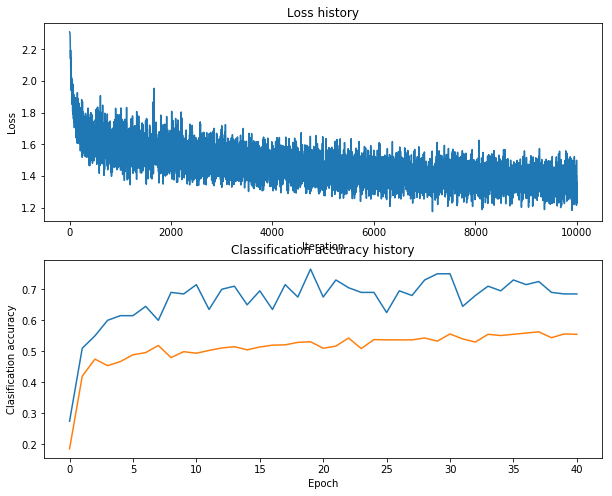

In [12]:
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

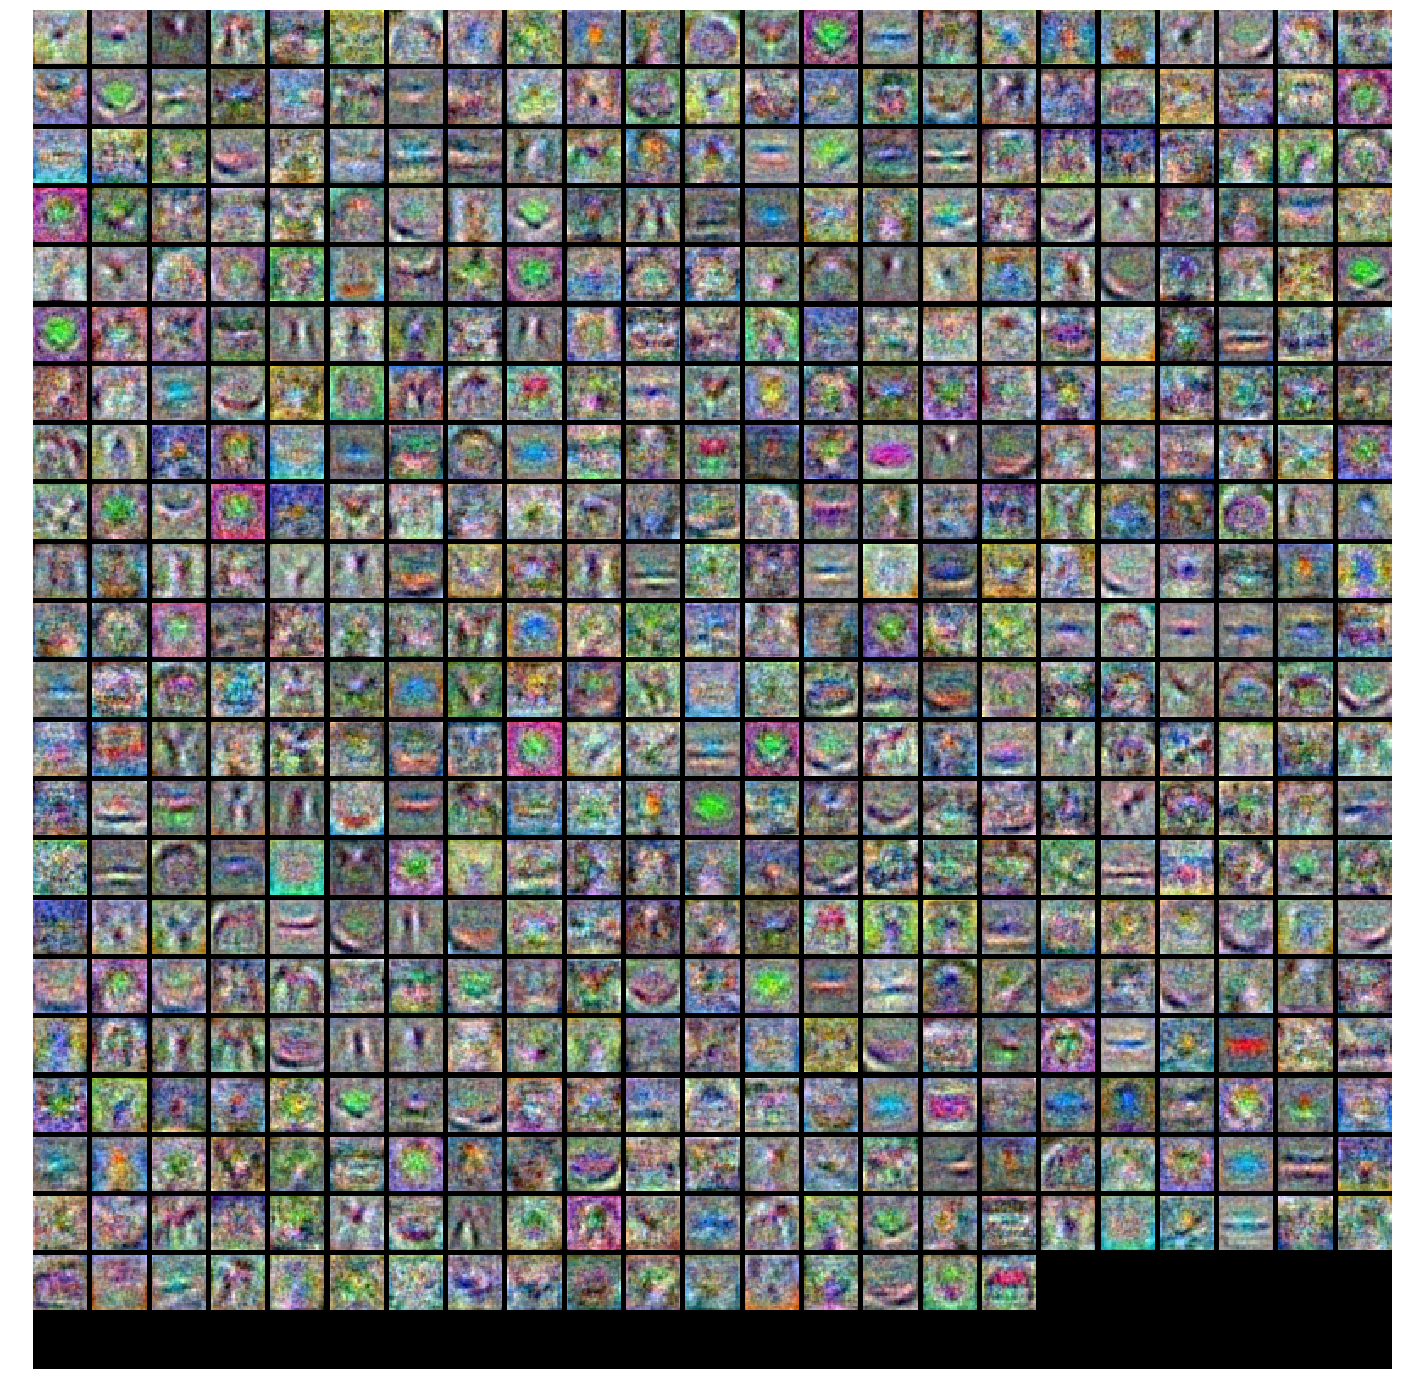

In [17]:
# visualize the weights of the best network
plt.rcParams['figure.figsize'] = (25, 25)
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [14]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.554
